# Overview

## Library Imports & Data Pull

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('../data/datapull.csv')  # Replace 'your_file.csv' with your actual file path

In [24]:
#looking at data
df.head()

,START_YR,TERM_DT,START_DT,YEARS_ACTIVE,EZ_PAY,MARRIED,WIDOWED,DIVORCED,SINGLE,UNKNOWN,...,ACCIDENT_FORGIVE,MULTIPOLICY,SERVICE_ACCT,AGENT_ACCT,REQUESTED_ACCT,ACCD_DT,PAID_OUT,HAS_ACCIDENT,YRS_TILL_FIRST_CLAIM,POLICY_NBR_SCRUB
0,1991,NaN,1991-03-26,34.333333,0,1,0,0,0,0,...,1,1,0,1,0,NaN,NaN,0,NaN,43
1,1989,NaN,1989-07-03,36.000000,0,1,0,0,0,0,...,1,1,0,1,0,2023-09-26,3467.17,1,34.166667,84
2,2017,NaN,2017-08-24,7.916667,0,1,0,0,0,0,...,1,1,0,1,0,NaN,NaN,0,NaN,289
3,2018,NaN,2018-01-30,7.500000,1,1,0,0,0,0,...,1,0,0,1,0,2022-09-05,11491.16,1,4.666667,305
4,2020,NaN,2020-02-11,5.416667,0,1,0,0,0,0,...,0,1,0,1,0,NaN,NaN,0,NaN,776


In [26]:
#list of columns
df.dtypes

START_YR                  int64
TERM_DT                  object
START_DT                 object
YEARS_ACTIVE            float64
EZ_PAY                    int64
MARRIED                   int64
WIDOWED                   int64
DIVORCED                  int64
SINGLE                    int64
UNKNOWN                   int64
ONLINE_ACCT               int64
ACCIDENT_FORGIVE          int64
MULTIPOLICY               int64
SERVICE_ACCT              int64
AGENT_ACCT                int64
REQUESTED_ACCT            int64
ACCD_DT                  object
PAID_OUT                float64
HAS_ACCIDENT              int64
YRS_TILL_FIRST_CLAIM    float64
POLICY_NBR_SCRUB          int64
dtype: object

In [32]:
# df.groupby('CLAIM_FLAG').mean()
## IF A POLICY HOLDER HAS NO CLAIMS THEN WE PUT 0 FOR AMOUNT PAID OUT VS NAN
df['PAID_OUT'] = df['PAID_OUT'].fillna(0)
df.groupby('HAS_ACCIDENT').mean(numeric_only=True)

,START_YR,YEARS_ACTIVE,EZ_PAY,MARRIED,WIDOWED,DIVORCED,SINGLE,UNKNOWN,ONLINE_ACCT,ACCIDENT_FORGIVE,MULTIPOLICY,SERVICE_ACCT,AGENT_ACCT,REQUESTED_ACCT,PAID_OUT,YRS_TILL_FIRST_CLAIM,POLICY_NBR_SCRUB
HAS_ACCIDENT,,,,,,,,,,,,,,,,,
0,2019.904090,5.124432,0.718354,0.618549,0.055988,0.070837,0.254382,0.000243,0.933544,0.332278,0.906767,0.0,0.976874,0.023126,0.000000,NaN,3181.787001
1,2019.565913,5.465021,0.718147,0.657474,0.038058,0.068946,0.235521,0.000000,0.978489,0.463320,0.890789,0.0,0.999448,0.000552,9740.519575,3.692545,2460.728075


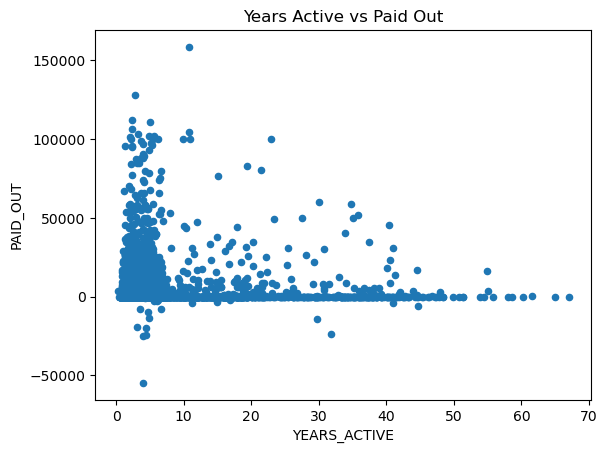

In [34]:
#visualize claims pay but length of years active
df.plot.scatter(x='YEARS_ACTIVE', y='PAID_OUT', title='Years Active vs Paid Out')

# Show the plot
# We find that the highest paid claiims are from customers with less than 10 years of tenure
plt.show()

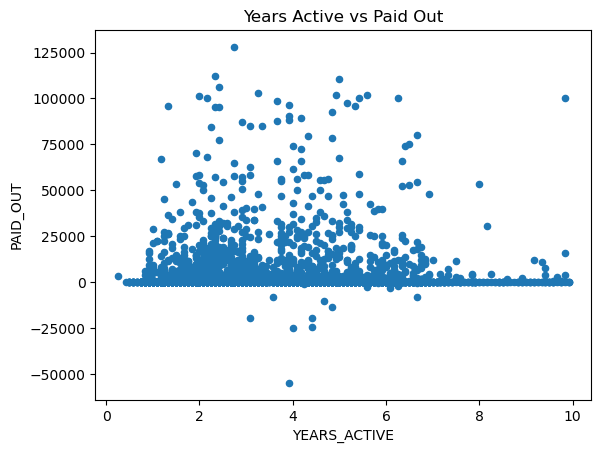

In [36]:
# redoing plot looking at policy holders with < 10 years
filtered_df = df[df['YEARS_ACTIVE'] < 10]

filtered_df.plot.scatter(x='YEARS_ACTIVE', y='PAID_OUT', title='Years Active vs Paid Out')

#looking at policies with < 10 years of tenure, there is no tight correlation
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


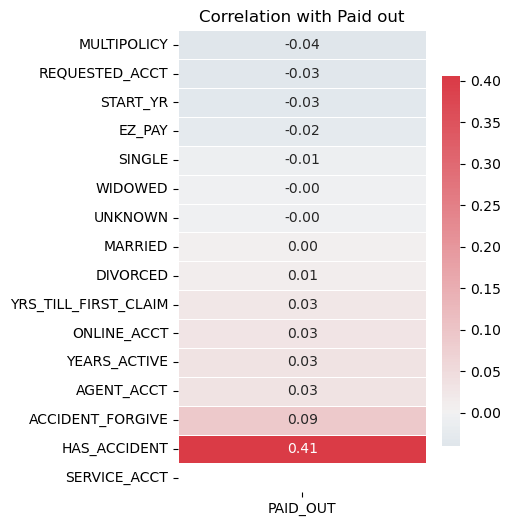

In [38]:

# Compute correlation matrix for numeric columns
corr_matrix = df.drop('POLICY_NBR_SCRUB',axis=1).corr(numeric_only=True)

# Select correlation of all numeric columns with 'PAID_OUT'
paid_out_corr = corr_matrix['PAID_OUT'].drop('PAID_OUT')  # Remove correlation of PAID_OUT with itself

# print(paid_out_corr)

# Extract correlation of all columns with 'PAID_OUT' (exclude self-correlation)
paid_out_corr = corr_matrix[['PAID_OUT']].drop(index='PAID_OUT').sort_values(by = 'PAID_OUT', ascending=True)

# Create a custom diverging colormap: blue for negative, red for positive
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

plt.figure(figsize=(4, 6))
sns.heatmap(
    paid_out_corr,
    annot=True,
    cmap=cmap,
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    yticklabels=True
)
plt.title('Correlation with Paid out')
plt.show()